In [1]:
import requests

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
    }

response = requests.get('https://foundersfund.com/wp-json/wp/v2/company?per_page=100', headers=headers).json()

industries, names, descriptions, founders, websites = (
    [company.get("industry") for company in response],
    [company.get("title", {}).get("rendered") for company in response],
    [company.get("yoast_head_json", {}).get("og_description") for company in response],
    [company.get("founders", []) for company in response],
    [company.get("link") for company in response]
)

### Creating dataframe

In [2]:
import pandas as pd

df=pd.DataFrame({"name": names, "industry": industries, "founder": founders, "description": descriptions,  "website": websites})
df

,name,industry,founder,description,website
0,SpaceX,Aerospace &amp; Transportation,"[{'founder_name': 'Elon Musk', 'founder_crunch...",The first company to achieve orbit with a liqu...,https://foundersfund.com/company/spacex/
1,Palantir,Analytics &amp; Software,"[{'founder_name': 'Alexander Karp', 'founder_c...",Palantir&#8217;s ground-breaking software allo...,https://foundersfund.com/company/palantir/
2,Stripe,Analytics &amp; Software,"[{'founder_name': 'Patrick Collison', 'founder...",Stripe makes it easy to perform online financi...,https://foundersfund.com/company/stripe/
3,Anduril,Advanced Machines &amp; Intelligence,"[{'founder_name': 'Brian Schimpf', 'founder_cr...",Anduril brings together top technical talent t...,https://foundersfund.com/company/anduril/
4,Facebook,Consumer Internet &amp; Media,"[{'founder_name': 'Mark Zuckerberg', 'founder_...",Facebook is the largest social network in the ...,https://foundersfund.com/company/facebook/
...,...,...,...,...,...
93,Cover,Real Estate &amp; Technology,"[{'founder_name': 'Alexis Rivas', 'founder_cru...",Cover is developing the first custom home buil...,https://foundersfund.com/company/cover/
94,Built Robotics,Advanced Machines &amp; Intelligence,"[{'founder_name': 'Noah Ready-Campbell', 'foun...",We build the robots that build the world.,https://foundersfund.com/company/built-robotics/
95,Earable,Advanced Machines &amp; Intelligence,None,Earable is a neuroscience company developing w...,https://foundersfund.com/company/earable/
96,ZocDoc,Biotechnology &amp; Health,"[{'founder_name': 'Cyrus Massoumi', 'founder_c...",ZocDoc is the tech company at the beginning of...,https://foundersfund.com/company/zocdoc/


### Cleaning

In [3]:
df["industry"] = df["industry"].str.replace("&amp;", "&")
df.head()

,name,industry,founder,description,website
0,SpaceX,Aerospace & Transportation,"[{'founder_name': 'Elon Musk', 'founder_crunch...",The first company to achieve orbit with a liqu...,https://foundersfund.com/company/spacex/
1,Palantir,Analytics & Software,"[{'founder_name': 'Alexander Karp', 'founder_c...",Palantir&#8217;s ground-breaking software allo...,https://foundersfund.com/company/palantir/
2,Stripe,Analytics & Software,"[{'founder_name': 'Patrick Collison', 'founder...",Stripe makes it easy to perform online financi...,https://foundersfund.com/company/stripe/
3,Anduril,Advanced Machines & Intelligence,"[{'founder_name': 'Brian Schimpf', 'founder_cr...",Anduril brings together top technical talent t...,https://foundersfund.com/company/anduril/
4,Facebook,Consumer Internet & Media,"[{'founder_name': 'Mark Zuckerberg', 'founder_...",Facebook is the largest social network in the ...,https://foundersfund.com/company/facebook/


In [4]:
pd.set_option('display.max_colwidth', None)
df.head(5)

,name,industry,founder,description,website
0,SpaceX,Aerospace & Transportation,"[{'founder_name': 'Elon Musk', 'founder_crunchbase_slug': 'https://twitter.com/elonmusk'}]","The first company to achieve orbit with a liquid-fueled rocket, SpaceX develops launch systems at dramatically-lower costs than any entity — government or private — in history.",https://foundersfund.com/company/spacex/
1,Palantir,Analytics & Software,"[{'founder_name': 'Alexander Karp', 'founder_crunchbase_slug': 'https://en.wikipedia.org/wiki/Alex_Karp'}]",Palantir&#8217;s ground-breaking software allows analysts to understand vast quantities of information.,https://foundersfund.com/company/palantir/
2,Stripe,Analytics & Software,"[{'founder_name': 'Patrick Collison', 'founder_crunchbase_slug': 'https://twitter.com/patrickc'}, {'founder_name': 'John Collison', 'founder_crunchbase_slug': 'https://twitter.com/collision'}]","Stripe makes it easy to perform online financial transactions, processing billions of dollars a year for thousands of businesses.",https://foundersfund.com/company/stripe/
3,Anduril,Advanced Machines & Intelligence,"[{'founder_name': 'Brian Schimpf', 'founder_crunchbase_slug': 'https://www.linkedin.com/in/bschimpf/'}, {'founder_name': 'Palmer Luckey', 'founder_crunchbase_slug': 'https://78.media.tumblr.com/tumblr_m6mn5yE37v1qb9jz7o1_500.gif'}, {'founder_name': 'Matt Grimm', 'founder_crunchbase_slug': 'https://www.linkedin.com/in/mttgrmm/'}, {'founder_name': 'Joe Chen', 'founder_crunchbase_slug': 'https://www.linkedin.com/in/chenhaus/'}, {'founder_name': 'Trae Stephens', 'founder_crunchbase_slug': 'https://www.linkedin.com/in/trae-stephens-485a811/'}]",Anduril brings together top technical talent to solve the most complex national security challenges.,https://foundersfund.com/company/anduril/
4,Facebook,Consumer Internet & Media,"[{'founder_name': 'Mark Zuckerberg', 'founder_crunchbase_slug': 'https://en.wikipedia.org/wiki/Mark_Zuckerberg'}]",Facebook is the largest social network in the world.,https://foundersfund.com/company/facebook/


In [5]:
df["founder"] = df["founder"].astype(str).str.replace("[{'founder_name': '", "").str.replace("'founder_crunchbase_slug': ", "").str.replace("'}]", "").str.replace("'", "").str.replace("}", "").str.replace("{founder_name: ", "")
df.head()

,name,industry,founder,description,website
0,SpaceX,Aerospace & Transportation,"Elon Musk, https://twitter.com/elonmusk","The first company to achieve orbit with a liquid-fueled rocket, SpaceX develops launch systems at dramatically-lower costs than any entity — government or private — in history.",https://foundersfund.com/company/spacex/
1,Palantir,Analytics & Software,"Alexander Karp, https://en.wikipedia.org/wiki/Alex_Karp",Palantir&#8217;s ground-breaking software allows analysts to understand vast quantities of information.,https://foundersfund.com/company/palantir/
2,Stripe,Analytics & Software,"Patrick Collison, https://twitter.com/patrickc, John Collison, https://twitter.com/collision","Stripe makes it easy to perform online financial transactions, processing billions of dollars a year for thousands of businesses.",https://foundersfund.com/company/stripe/
3,Anduril,Advanced Machines & Intelligence,"Brian Schimpf, https://www.linkedin.com/in/bschimpf/, Palmer Luckey, https://78.media.tumblr.com/tumblr_m6mn5yE37v1qb9jz7o1_500.gif, Matt Grimm, https://www.linkedin.com/in/mttgrmm/, Joe Chen, https://www.linkedin.com/in/chenhaus/, Trae Stephens, https://www.linkedin.com/in/trae-stephens-485a811/",Anduril brings together top technical talent to solve the most complex national security challenges.,https://foundersfund.com/company/anduril/
4,Facebook,Consumer Internet & Media,"Mark Zuckerberg, https://en.wikipedia.org/wiki/Mark_Zuckerberg",Facebook is the largest social network in the world.,https://foundersfund.com/company/facebook/


In [6]:
df[['founder_1', 'social_1', 'founder_2', 'social_2', 'founder_3', 'social_3', 'founder_4', 'social_4', 'founder_5', 'social_5']] = df['founder'].str.split(',', expand=True)
del df["founder"]
df.head(2)

,name,industry,description,website,founder_1,social_1,founder_2,social_2,founder_3,social_3,founder_4,social_4,founder_5,social_5
0,SpaceX,Aerospace & Transportation,"The first company to achieve orbit with a liquid-fueled rocket, SpaceX develops launch systems at dramatically-lower costs than any entity — government or private — in history.",https://foundersfund.com/company/spacex/,Elon Musk,https://twitter.com/elonmusk,None,None,None,None,None,None,None,None
1,Palantir,Analytics & Software,Palantir&#8217;s ground-breaking software allows analysts to understand vast quantities of information.,https://foundersfund.com/company/palantir/,Alexander Karp,https://en.wikipedia.org/wiki/Alex_Karp,None,None,None,None,None,None,None,None


In [34]:
df["description"] = df["description"].str.replace("&#8217;", "'").str.replace("\xa0"," ").str.replace("&nbsp;", "").str.replace("&#8211;", "–").str.strip()
df.head(2)

,name,industry,description,website,founder_1,social_1,founder_2,social_2,founder_3,social_3,founder_4,social_4,founder_5,social_5
0,SpaceX,Aerospace & Transportation,"The first company to achieve orbit with a liquid-fueled rocket, SpaceX develops launch systems at dramatically-lower costs than any entity — government or private — in history.",https://foundersfund.com/company/spacex/,Elon Musk,https://twitter.com/elonmusk,None,None,None,None,None,None,None,None
1,Palantir,Analytics & Software,Palantir's ground-breaking software allows analysts to understand vast quantities of information.,https://foundersfund.com/company/palantir/,Alexander Karp,https://en.wikipedia.org/wiki/Alex_Karp,None,None,None,None,None,None,None,None


### Viz

In [8]:
# komposisi industri
# founder dengan perusahaan terbanyak
# wordcloud desc

In [94]:
import matplotlib.pyplot as plt

In [9]:
df['industry'].value_counts()

industry
Analytics & Software                40
Biotechnology & Health              19
Advanced Machines & Intelligence    18
Consumer Internet & Media           13
Aerospace & Transportation           3
                                     3
Real Estate & Technology             2
Name: count, dtype: int64

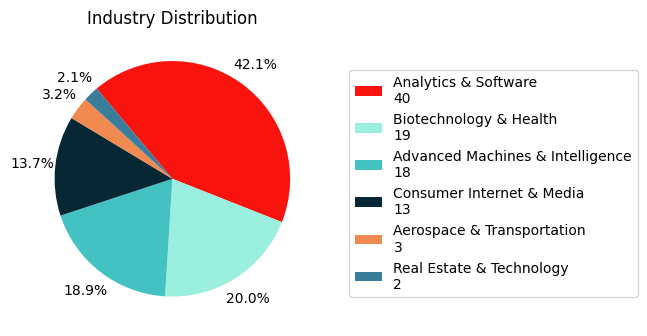

In [151]:
industry_comp = {
    "Analytics & Software": 40,
    "Biotechnology & Health": 19,
    "Advanced Machines & Intelligence": 18,
    "Consumer Internet & Media": 13,
    "Aerospace & Transportation": 3,
    "Real Estate & Technology":2
          }

sorted_industry_comp = sorted(industry_comp.items(), key= lambda key_value: key_value[1], reverse=True)

colors = ['#F8130E', '#9AEFDF', '#44C1C1', '#072735', '#F08A50', '#3A7D9A']

labels = [key_value_tuple[0] for key_value_tuple in sorted_industry_comp]
data = [key_value_tuple[1] for key_value_tuple in sorted_industry_comp]
labels = ['{}\n{:,.0f}'.format(label,value)
          for label, value in zip(labels,data)]

total = sum(data)
percentages = ["{0:.1%}".format(value / total) for value in data]

plt.pie(data,labels=percentages,startangle=130,counterclock=False,
    colors=colors,textprops={"ha":"center"},labeldistance=1.2)
plt.legend(labels=labels,loc=(1.1,0.1))
plt.tight_layout(pad=3)
plt.title('Industry Distribution')

plt.show()

In [64]:
pd.concat([df["founder_1"], df["founder_2"], df["founder_3"], df["founder_4"], df["founder_5"]]).value_counts()

Elon Musk           3
 Jack Abraham       1
 Márcio Colunas     1
 Brian Riordan      1
 Steve Chew         1
                   ..
Jake Loosararian    1
John Hanke          1
Ali Diab            1
Alex Austin         1
 Daniel Da Costa    1
Name: count, Length: 225, dtype: int64

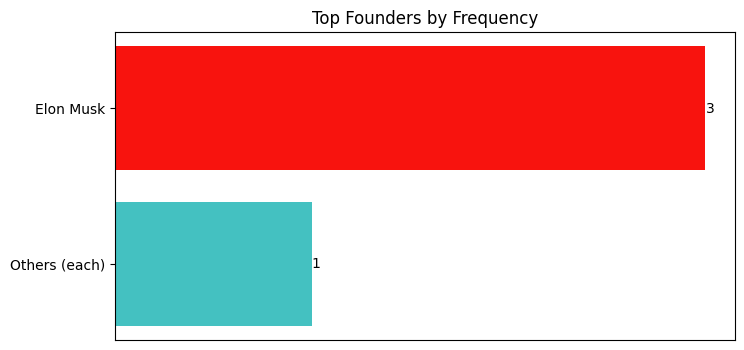

In [93]:
summary = {"Others (each)": 1, "Elon Musk": 3}

labels = list(summary.keys())
values = list(summary.values())

plt.figure(figsize=(8, 4))
bars = plt.barh(labels, values, color=['#44C1C1', '#F8130E'])
plt.title('Top Founders by Frequency')
plt.xticks([])

# Annotate each bar with its value
for bar, value in zip(bars, values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, value,
             ha='left', va='center', color='black', fontsize=10)

plt.show()


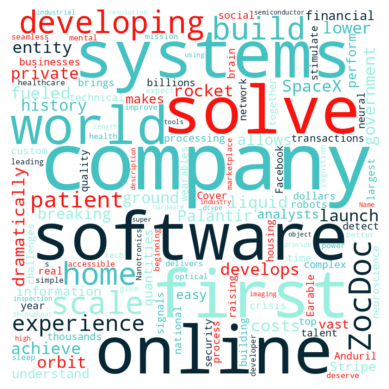

In [103]:
from wordcloud import WordCloud, STOPWORDS
import random


colors = ['#F8130E', '#9AEFDF', '#44C1C1', '#072735']

def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return random.choice(colors)

wc = WordCloud(
    background_color="white",
    stopwords=STOPWORDS,
    height=800,
    width=800,
    color_func=random_color_func
)

wc.generate(str(df["description"]))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()